In [1]:
import pandas as pd
from os import path
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
DATA_DIR = "../../data"

# Load data from SAbDab (Chen) and TAP

In [3]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/chen_data.csv"), index_col=0)
chen_data

,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0
...,...,...,...,...
2404,6s5a,EVKLLESGGGLVQPGGSLKLSCAASGFDFSRYWMNWVRQAPGKGLE...,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,0
2405,6tyb,EVQLVQSGTEVKRPGESLTISCKTSGYSFSGTWISWVRQMPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGISTYLAWYQQKPGKAPKL...,0
2406,6u1t,EVQLVESGGGLVKPGGSLKLSCAASGFTFSSYDMSWVRQTPEKRLE...,DIQMTQSPASQSASLGESVTITCLASQTIGTWLAWYQQKPGKSPQL...,0
2407,7fab,AVQLEQSGPGLVRPSQTLSLTCTVSGTSFDDYYWTWVRQPPGRGLE...,ASVLTQPPSVSGAPGQRVTISCTGSSSNIGAGHNVKWYQQLPGTAP...,0


In [4]:
tap_data = pd.read_csv(path.join(DATA_DIR, "tap/TAP_data.csv"), index_col=0)
tap_data

,heavy,light,CDR_length,PSH,PPC,PNC,SFvCSP,Y
Antibody_ID,,,,,,,,
Abagovomab,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,46,129.7603,0.0000,0.0000,16.32,1
Abituzumab,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,45,115.9106,0.0954,0.0421,-3.10,1
Abrilumab,QVQLVQSGAEVKKPGASVKVSCKVSGYTLSDLSIHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,45,109.6995,0.0000,0.8965,-4.00,1
Actoxumab,QVQLVESGGGVVQPGRSLRLSCAASGFSFSNYGMHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQHKPGKAPKL...,49,112.6290,0.0000,1.1247,3.10,1
Adalimumab,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,48,111.2512,0.0485,1.1364,-19.50,1
...,...,...,...,...,...,...,...,...
Visilizumab,QVQLVQSGAEVKKPGASVKVSCKASGYTFISYTMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCSASSSVSYMNWYQQKPGKAPKRL...,46,124.0825,0.1417,0.1812,8.40,1
Vonlerolizumab,EVQLVQSGAEVKKPGASVKVSCKASGYTFTDSYMSWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLNWYQQKPGKAPKL...,44,118.5559,0.2029,0.3046,0.00,1
Zalutumumab,QVQLVESGGGVVQPGRSLRLSCAASGFTFSTYGMHWVRQAPGKGLE...,AIQLTQSPSSLSASVGDRVTITCRASQDISSALVWYQQKPGKAPKL...,52,121.8996,0.0000,1.2505,0.00,1


# Numbering encoding

In [5]:
x_chen = pd.read_csv(path.join(DATA_DIR, "chen/integer_encoding/chen_integer_encoded.csv"), index_col=0)
x_chen.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,271,272,273,274,275,276,277,278,279,280
0,12e8,4,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,0
1,15c8,4,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,0
2,1a0q,4,18,14,10,14,4,16,3,1,...,0,0,0,0,0,0,0,0,0,0
3,1a14,14,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,0
4,1a2y,14,18,14,10,14,4,16,6,13,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_tap = pd.read_csv(path.join(DATA_DIR, "tap/integer_encoding/tap_integer_encoded.csv"))
x_tap.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,271,272,273,274,275,276,277,278,279,280
0,Abagovomab,14,18,9,10,14,4,16,6,1,...,0,0,0,0,0,0,0,0,0,0
1,Abituzumab,14,18,14,10,14,14,16,6,6,...,0,0,0,0,0,0,0,0,0,0
2,Abrilumab,14,18,14,10,18,14,16,6,1,...,0,0,0,0,0,0,0,0,0,0
3,Actoxumab,14,18,14,10,18,4,16,6,6,...,0,0,0,0,0,0,0,0,0,0
4,Adalimumab,4,18,14,10,18,4,16,6,6,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_chen["label"] = "Chen"
x_tap["label"] = "TAP"
x_data = pd.concat([x_chen, x_tap])
x_data.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,272,273,274,275,276,277,278,279,280,label
0,12e8,4,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,Chen
1,15c8,4,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,Chen
2,1a0q,4,18,14,10,14,4,16,3,1,...,0,0,0,0,0,0,0,0,0,Chen
3,1a14,14,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,Chen
4,1a2y,14,18,14,10,14,4,16,6,13,...,0,0,0,0,0,0,0,0,0,Chen


In [8]:
x_data.tail()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,272,273,274,275,276,277,278,279,280,label
236,Visilizumab,14,18,14,10,18,14,16,6,1,...,0,0,0,0,0,0,0,0,0,TAP
237,Vonlerolizumab,4,18,14,10,18,14,16,6,1,...,0,0,0,0,0,0,0,0,0,TAP
238,Zalutumumab,14,18,14,10,18,4,16,6,6,...,0,0,0,0,0,0,0,0,0,TAP
239,Zanolimumab,14,18,14,10,14,14,19,6,1,...,0,0,0,0,0,0,0,0,0,TAP
240,Zolbetuximab (Claudiximab),14,18,14,10,14,14,13,6,1,...,0,0,0,0,0,0,0,0,0,TAP


## Plot PCA of both sets

In [13]:
def plot_pca(
    x, y, components, comp_to_plot=[0,1], name=None
):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(x)
    
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum = np.cumsum(exp_var_pca)
    
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    
    plt.show()
    
    plot_pca_precomp(X_pca, y, comp_to_plot, name=name)
    return X_pca

In [21]:
def plot_pca_precomp(x_pc, y, comp_to_plot, name=None):
    df = pd.DataFrame()
    df['x'] = x_pc[:,comp_to_plot[0]]
    df['y'] = x_pc[:,comp_to_plot[1]]
    df["label"] = y
    plt.figure(figsize=(14,8))
    ax = sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        legend="full",
        alpha=0.6,
        palette=['#1f76b4','orange'],
        s=40
    )
    ax.set_xlabel("PC1", size=15)
    ax.set_ylabel("PC2", size=15)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    ax.set(xlabel=f'PC{comp_to_plot[0] + 1}', ylabel=f'PC{comp_to_plot[1] + 1}')
    if name is not None:
        plt.savefig(name)
    plt.show()

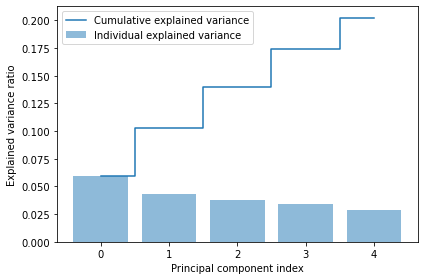

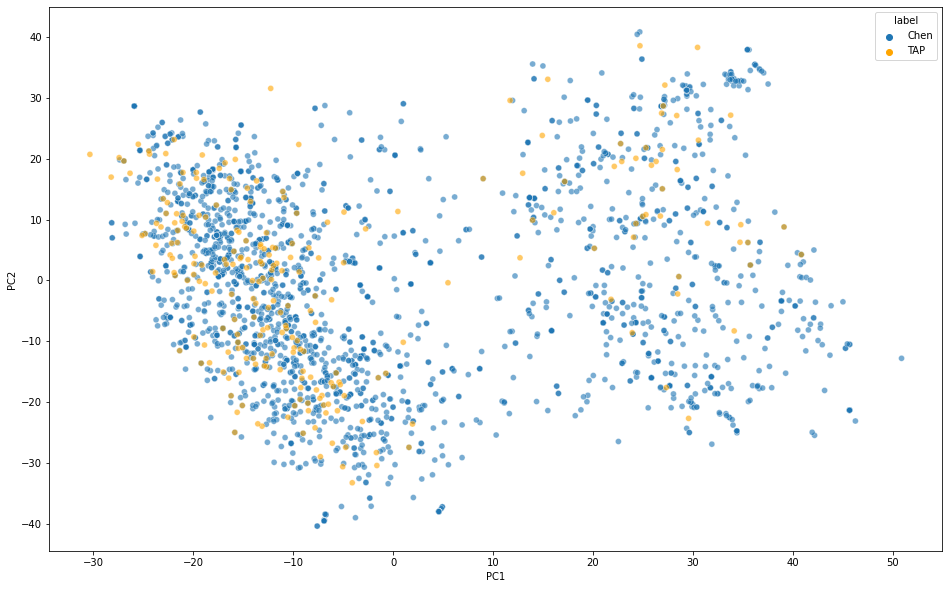

In [12]:
pca_transformed = plot_pca(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=5, comp_to_plot=[0,1])

## Plot t-SNE of both sets

In [13]:
def plot_tsne(
    x, y, components, perplexity, n_iter, metric, comp_to_plot=[0,1]
):
    tsne = TSNE(n_components=components, verbose=1, perplexity=perplexity, n_iter=n_iter, metric=metric)
    X_embedded = tsne.fit_transform(x)
    
    df = pd.DataFrame()
    df['x'] = X_embedded[:,comp_to_plot[0]]
    df['y'] = X_embedded[:,comp_to_plot[1]]
    df["label"] = y

    plt.figure(figsize=(16,10))
    ax = sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        legend="full",
        alpha=0.6,
        palette=['#1f76b4','orange']
    )
    ax.set(xlabel=f'PC{comp_to_plot[0] + 1}', ylabel=f'PC{comp_to_plot[1] + 1}')
    plt.show()

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2650 samples in 0.001s...
[t-SNE] Computed neighbors for 2650 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2650
[t-SNE] Computed conditional probabilities for sample 2000 / 2650
[t-SNE] Computed conditional probabilities for sample 2650 / 2650
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.909836
[t-SNE] KL divergence after 300 iterations: 1.290758


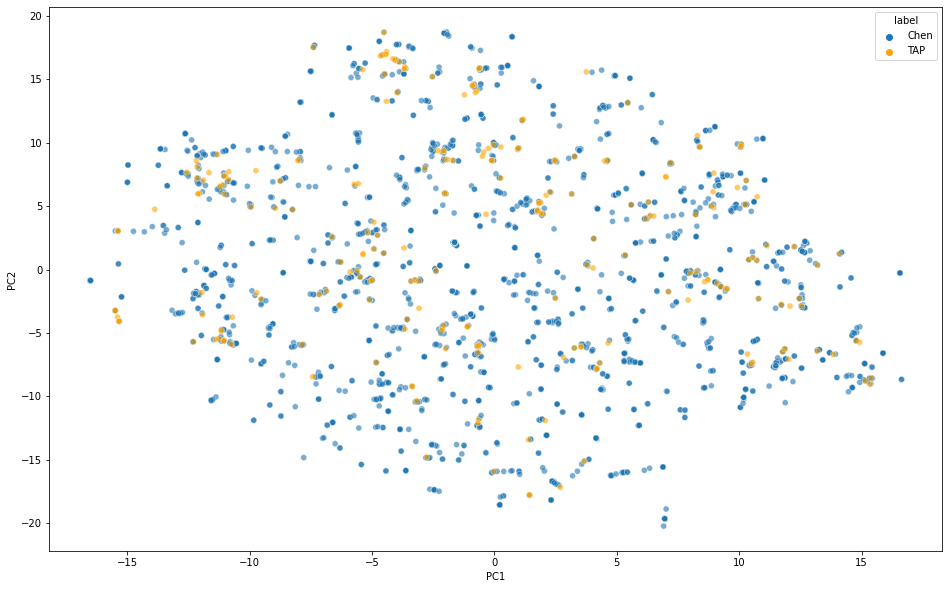

In [13]:
plot_tsne(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=2, perplexity=40, n_iter=300, metric="euclidean")

In this encoding, the two datasets don't separate, which is good.

# ANARCI numbering

In [33]:
x_chen = pd.read_csv(path.join(DATA_DIR, "chen/integer_encoding/chen_integers_from_anarci.csv"), index_col=0)
x_chen = x_chen.loc[chen_data.index]
x_chen.head()

,Ab_ID,1,2,3,3A,4,4A,5,6,7,...,118.1,119.1,120.1,121.1,122.1,123.1,124.1,125.1,126.1,127.1
0,12e8,4.0,18.0,14.0,21.0,10.0,21.0,14.0,14.0,16.0,...,5,6,1,6,17,9,10,4,10,9
1,15c8,4.0,18.0,14.0,21.0,10.0,21.0,14.0,14.0,16.0,...,5,6,6,6,17,9,10,4,8,9
2,1a0q,4.0,18.0,14.0,21.0,10.0,21.0,14.0,4.0,16.0,...,5,6,6,6,17,9,10,4,8,9
3,1a14,14.0,18.0,14.0,21.0,10.0,21.0,14.0,14.0,16.0,...,5,6,6,6,17,21,21,21,21,21
4,1a2y,14.0,18.0,14.0,21.0,10.0,21.0,14.0,4.0,16.0,...,5,6,6,6,17,9,10,4,8,9


In [34]:
x_tap = pd.read_csv(path.join(DATA_DIR, "tap/integer_encoding/tap_integers_from_anarci.csv"))
x_tap.head()

,Ab_ID,1,2,3,4,5,6,7,8,9,...,118.1,119.1,120.1,121.1,122.1,123.1,124.1,125.1,126.1,127.1
0,Abagovomab,14,18,9,10,14,4,16,6,1,...,5,6,6,6,17,9,10,4,8,9
1,Abituzumab,14,18,14,10,14,14,16,6,6,...,5,6,14,6,17,9,18,4,8,9
2,Abrilumab,14,18,14,10,18,14,16,6,1,...,5,6,14,6,17,9,18,4,8,9
3,Actoxumab,14,18,14,10,18,4,16,6,6,...,5,6,14,6,17,9,18,4,8,9
4,Adalimumab,4,18,14,10,18,4,16,6,6,...,5,6,14,6,17,9,18,4,8,9


In [35]:
x_chen.insert(1, "label", "Chen")
x_tap.insert(1, "label", "TAP")
#x_tap["label"] = "TAP"
x_data = pd.concat([x_chen, x_tap])
x_data.head()

,Ab_ID,label,1,2,3,3A,4,4A,5,6,...,119.1,120.1,121.1,122.1,123.1,124.1,125.1,126.1,127.1,68A
0,12e8,Chen,4.0,18.0,14.0,21.0,10.0,21.0,14.0,14.0,...,6,1,6,17,9,10,4,10,9,NaN
1,15c8,Chen,4.0,18.0,14.0,21.0,10.0,21.0,14.0,14.0,...,6,6,6,17,9,10,4,8,9,NaN
2,1a0q,Chen,4.0,18.0,14.0,21.0,10.0,21.0,14.0,4.0,...,6,6,6,17,9,10,4,8,9,NaN
3,1a14,Chen,14.0,18.0,14.0,21.0,10.0,21.0,14.0,14.0,...,6,6,6,17,21,21,21,21,21,NaN
4,1a2y,Chen,14.0,18.0,14.0,21.0,10.0,21.0,14.0,4.0,...,6,6,6,17,9,10,4,8,9,NaN


In [36]:
x_data.isna().sum()

Ab_ID       4
label       0
1           2
2           2
3           2
         ... 
124.1       0
125.1       0
126.1       0
127.1       0
68A      1577
Length: 345, dtype: int64

In [40]:
x_data = x_data[x_data["Ab_ID"].notna()]
x_data.fillna(0, inplace=True)

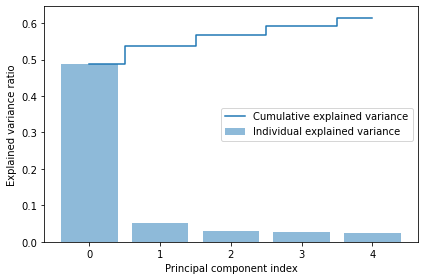

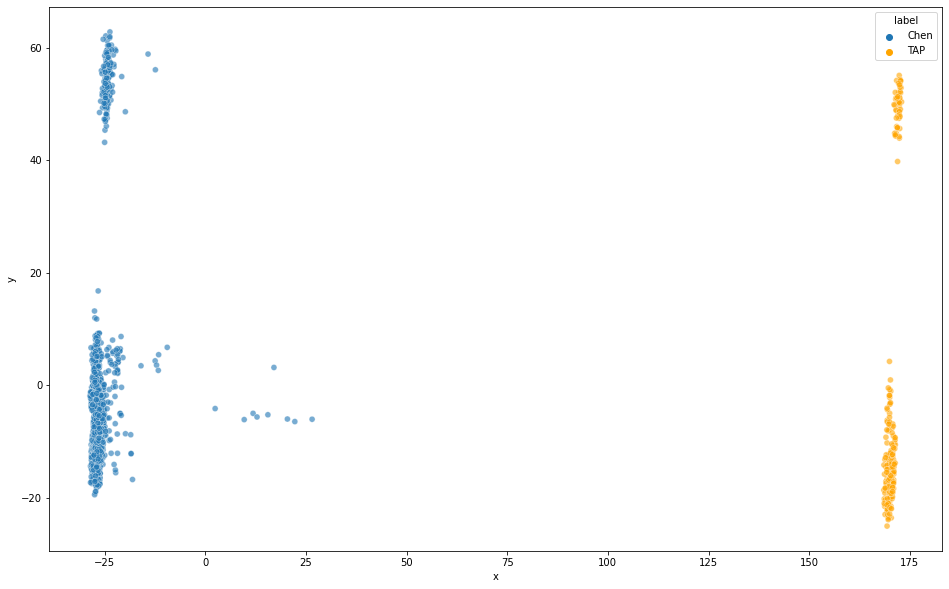

In [41]:
pca_transformed = plot_pca(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=5, comp_to_plot=[0,1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1814 samples in 0.001s...
[t-SNE] Computed neighbors for 1814 samples in 0.177s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1814
[t-SNE] Computed conditional probabilities for sample 1814 / 1814
[t-SNE] Mean sigma: 19.141600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.422211
[t-SNE] KL divergence after 300 iterations: 1.134848


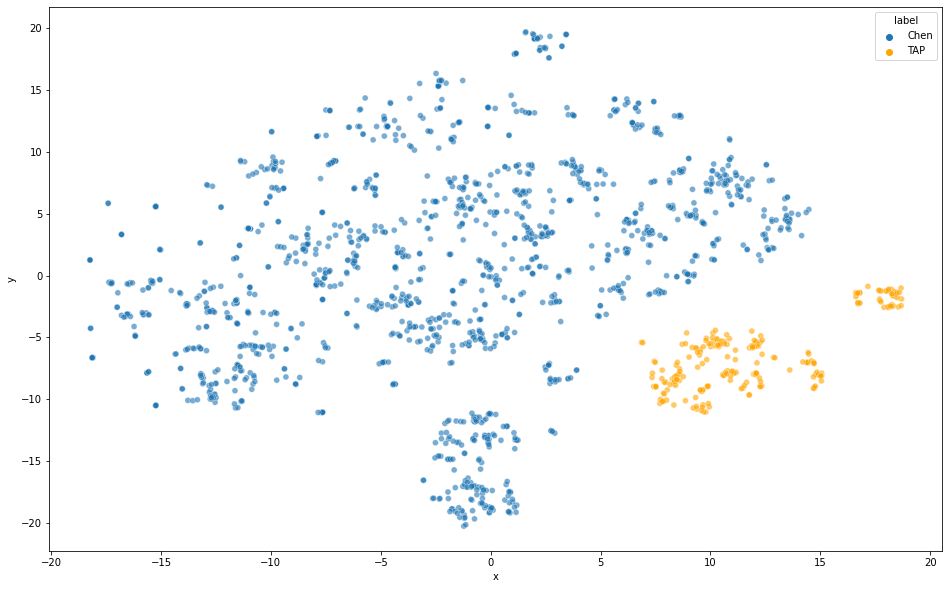

In [42]:
plot_tsne(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=2, perplexity=40, n_iter=300, metric="euclidean")

This looks wrong, but hopefully it's due to the differences in length and padding with zeros.

# PyBioMed

In [16]:
x_chen = pd.read_feather(path.join(DATA_DIR, "chen/pybiomed/deduplicated_X_data.ftr"))
x_chen = x_chen.merge(chen_data["Antibody_ID"], left_on="Ab_ID", right_on="Antibody_ID").drop(["Antibody_ID"], axis=1)
x_chen.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,19750,19751,19752,19753,19754,19755,19756,19757,19758,19759
0,12e8,7.500,3.333,2.500,5.833,1.667,5.833,5.833,9.167,1.667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15c8,9.244,0.000,3.361,5.882,1.681,4.202,6.723,8.403,2.521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1a0q,5.882,1.681,3.361,5.042,1.681,5.882,5.042,9.244,1.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1a14,6.667,2.500,4.167,5.000,1.667,2.500,7.500,11.667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1a2y,3.448,5.172,4.310,6.034,1.724,2.586,6.034,10.345,0.862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
x_tap = pd.read_feather(path.join(DATA_DIR, "tap/pybiomed/X_TAP_data.ftr"))
x_tap.head()

,0,1,2,3,4,5,6,7,8,9,...,19750,19751,19752,19753,19754,19755,19756,19757,19758,19759
0,10.084,3.361,2.521,3.361,1.681,3.361,5.882,11.765,0.840,1.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.627,4.237,1.695,3.390,1.695,5.085,5.932,10.169,0.847,2.542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.932,1.695,0.000,5.932,1.695,5.085,6.780,10.169,0.847,1.695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.738,6.557,4.098,5.738,1.639,3.279,4.918,11.475,0.820,3.279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.091,4.959,3.306,5.785,1.653,4.132,4.132,9.091,1.653,2.479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
x_chen["label"] = "SAbDab"
x_tap["label"] = "TAP"
x_data = pd.concat([x_chen, x_tap])
x_data.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,19751,19752,19753,19754,19755,19756,19757,19758,19759,label
0,12e8,7.500,3.333,2.500,5.833,1.667,5.833,5.833,9.167,1.667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAbDab
1,15c8,9.244,0.000,3.361,5.882,1.681,4.202,6.723,8.403,2.521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAbDab
2,1a0q,5.882,1.681,3.361,5.042,1.681,5.882,5.042,9.244,1.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAbDab
3,1a14,6.667,2.500,4.167,5.000,1.667,2.500,7.500,11.667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAbDab
4,1a2y,3.448,5.172,4.310,6.034,1.724,2.586,6.034,10.345,0.862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAbDab


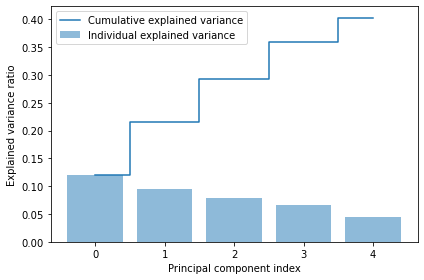

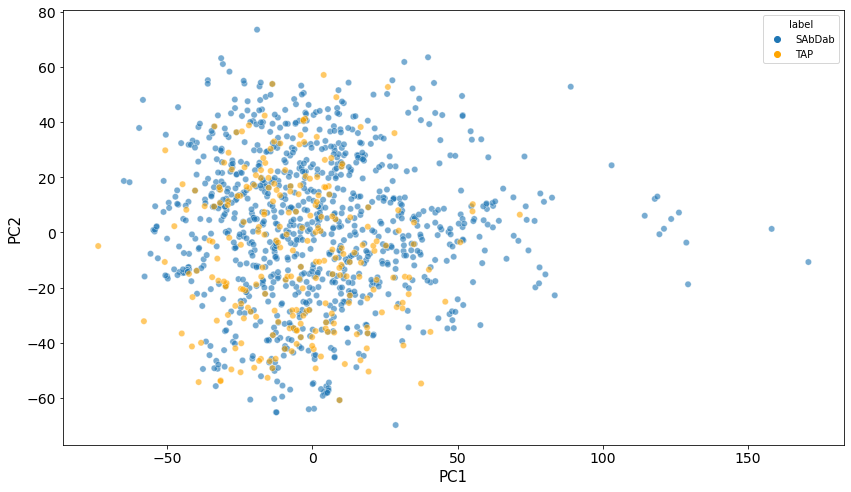

In [22]:
pca_transformed = plot_pca(
    x_data.drop(["Ab_ID", "label"], axis=1), 
    list(x_data["label"]), components=5, comp_to_plot=[0,1],
    name=path.join(DATA_DIR, "images/pca_pybiomed_chen_tap_01.png")
)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1818 samples in 0.018s...
[t-SNE] Computed neighbors for 1818 samples in 2.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1818
[t-SNE] Computed conditional probabilities for sample 1818 / 1818
[t-SNE] Mean sigma: 26.527156
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.319466
[t-SNE] KL divergence after 300 iterations: 1.149843


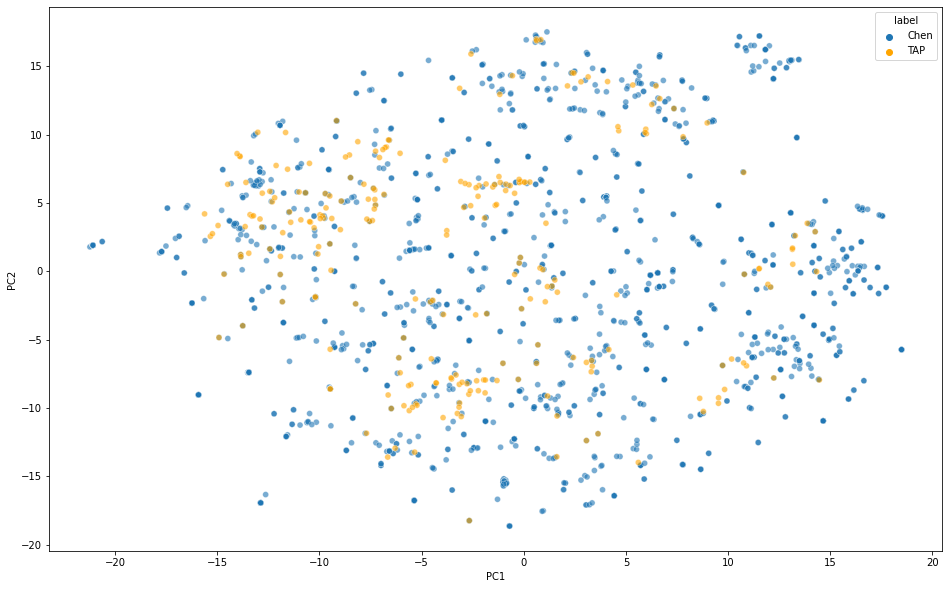

In [14]:
plot_tsne(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=2, perplexity=40, n_iter=300, metric="euclidean")

# BERT Embeddings

In [23]:
x_chen = pd.read_feather(path.join(DATA_DIR, "chen/embeddings/bert/bert_chen_embeddings.ftr"))
x_chen = x_chen.loc[chen_data.index]
x_chen.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,12e8,0.000388,-0.023631,0.008127,-0.042201,0.069842,-0.020211,0.009360,-0.093598,-0.015777,...,0.000845,-0.017396,-0.025206,0.006201,0.003746,0.038917,-0.032526,-0.039207,-0.014133,-0.013472
1,15c8,-0.007020,-0.024430,0.014849,-0.031923,0.054462,-0.025220,0.007521,-0.098703,-0.016063,...,-0.007535,0.021122,-0.044553,-0.009425,-0.004844,0.044911,-0.022525,-0.019677,-0.013022,-0.049844
2,1a0q,-0.017142,-0.008645,0.008613,-0.046730,0.061336,-0.017951,0.020446,-0.108641,0.002343,...,-0.016876,-0.005492,-0.037837,-0.009891,-0.018668,0.045293,-0.042225,-0.015849,-0.002904,-0.023377
3,1a14,-0.016770,-0.016028,0.005558,-0.022389,0.048435,-0.029777,0.005205,-0.091042,0.002346,...,-0.011850,0.005187,-0.027305,0.012193,0.013407,0.019745,-0.029758,-0.021011,0.000632,-0.014885
4,1a2y,0.022052,-0.024678,0.013147,-0.041079,0.054560,-0.009407,-0.007112,-0.076221,0.010534,...,-0.009879,-0.015750,-0.031617,-0.013962,-0.021564,0.045667,-0.028034,-0.023921,-0.020638,-0.019502


In [24]:
x_tap = pd.read_feather(path.join(DATA_DIR, "tap/embeddings/bert/bert_tap_embeddings.ftr"))
x_tap.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,Abagovomab,-0.004248,-0.024501,-0.011330,-0.027170,0.062747,-0.024793,0.009313,-0.083316,-0.005339,...,-0.008674,-0.002387,-0.021563,0.001087,-0.020986,0.047104,-0.038736,-0.021780,-0.022153,-0.024539
1,Abituzumab,0.006593,-0.013591,-0.008454,-0.043601,0.065095,-0.016896,-0.001596,-0.090935,-0.002940,...,0.000486,-0.013063,-0.021852,-0.003531,-0.024620,0.027387,-0.041001,-0.025708,-0.016437,-0.034342
2,Abrilumab,0.019445,-0.002642,-0.011395,-0.058757,0.060623,-0.015046,0.006317,-0.083772,-0.006775,...,0.005834,-0.017189,-0.014557,0.003359,-0.035368,0.020287,-0.033941,-0.023549,-0.008720,-0.044038
3,Actoxumab,-0.006365,-0.043729,0.005978,-0.025613,0.067748,-0.009542,0.017723,-0.096801,-0.007752,...,-0.000024,-0.012986,-0.019753,-0.004326,-0.044124,0.019544,-0.039559,-0.015679,-0.008837,-0.043877
4,Adalimumab,-0.012995,-0.035269,0.014127,-0.042136,0.080592,-0.012831,0.031889,-0.091308,-0.018166,...,-0.002067,-0.022957,-0.021145,-0.002762,-0.058199,0.026781,-0.046815,-0.010110,-0.008785,-0.041761


In [25]:
x_chen["label"] = "SAbDab"
x_tap["label"] = "TAP"
x_data = pd.concat([x_chen, x_tap])
x_data.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
0,12e8,0.000388,-0.023631,0.008127,-0.042201,0.069842,-0.020211,0.009360,-0.093598,-0.015777,...,-0.017396,-0.025206,0.006201,0.003746,0.038917,-0.032526,-0.039207,-0.014133,-0.013472,SAbDab
1,15c8,-0.007020,-0.024430,0.014849,-0.031923,0.054462,-0.025220,0.007521,-0.098703,-0.016063,...,0.021122,-0.044553,-0.009425,-0.004844,0.044911,-0.022525,-0.019677,-0.013022,-0.049844,SAbDab
2,1a0q,-0.017142,-0.008645,0.008613,-0.046730,0.061336,-0.017951,0.020446,-0.108641,0.002343,...,-0.005492,-0.037837,-0.009891,-0.018668,0.045293,-0.042225,-0.015849,-0.002904,-0.023377,SAbDab
3,1a14,-0.016770,-0.016028,0.005558,-0.022389,0.048435,-0.029777,0.005205,-0.091042,0.002346,...,0.005187,-0.027305,0.012193,0.013407,0.019745,-0.029758,-0.021011,0.000632,-0.014885,SAbDab
4,1a2y,0.022052,-0.024678,0.013147,-0.041079,0.054560,-0.009407,-0.007112,-0.076221,0.010534,...,-0.015750,-0.031617,-0.013962,-0.021564,0.045667,-0.028034,-0.023921,-0.020638,-0.019502,SAbDab


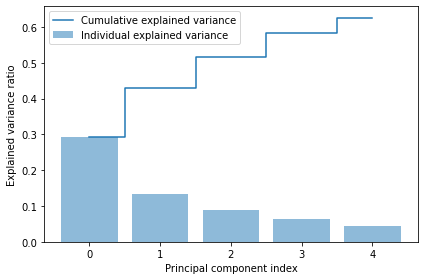

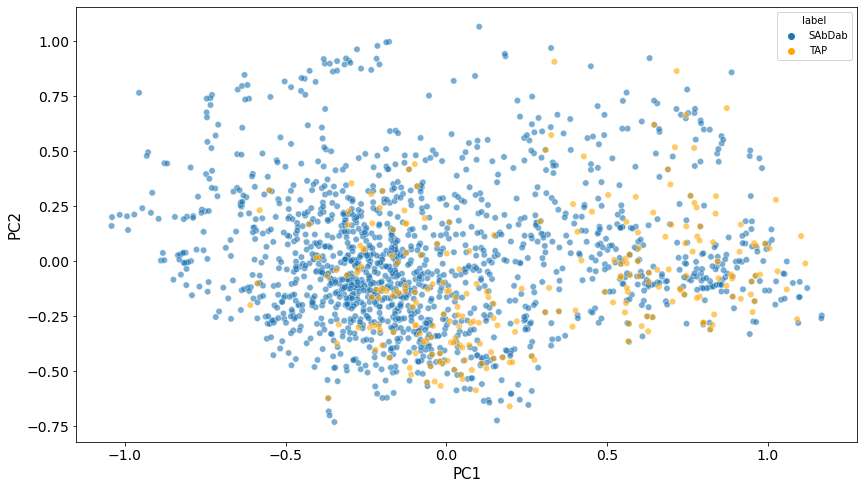

In [26]:
pca_transformed = plot_pca(
    x_data.drop(["Ab_ID", "label"], axis=1), 
    list(x_data["label"]), components=5, comp_to_plot=[0,1],
    name=path.join(DATA_DIR, "images/pca_bert_tap_chen_01.png")
)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1818 samples in 0.002s...
[t-SNE] Computed neighbors for 1818 samples in 0.625s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1818
[t-SNE] Computed conditional probabilities for sample 1818 / 1818
[t-SNE] Mean sigma: 0.279165
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.440262
[t-SNE] KL divergence after 300 iterations: 1.112593


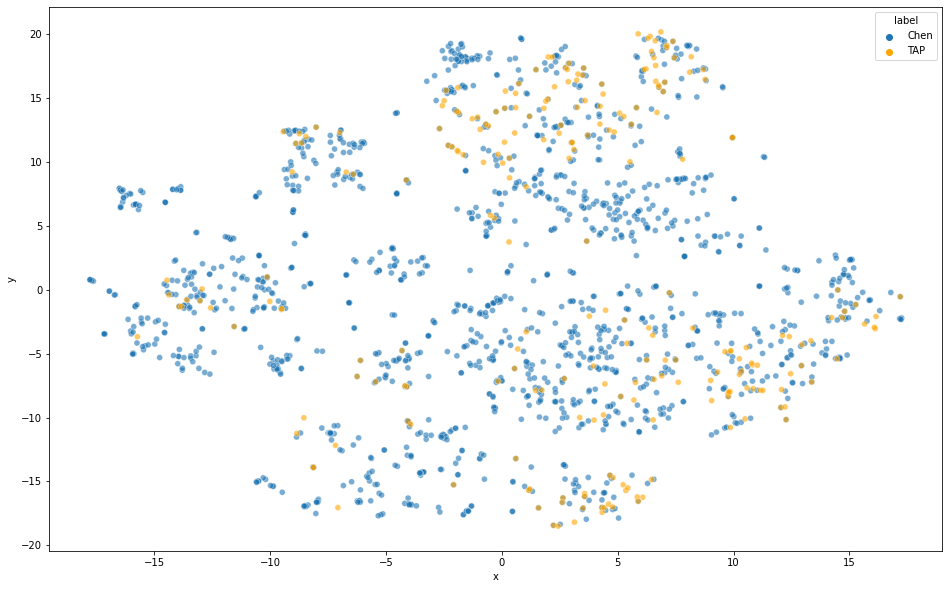

In [58]:
plot_tsne(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=2, perplexity=40, n_iter=300, metric="euclidean")

# SeqVec Embeddings

In [65]:
x_chen = pd.read_feather(path.join(DATA_DIR, "chen/embeddings/seqvec/seqvec_chen_embeddings.ftr"))
x_chen = x_chen.loc[chen_data.index]
x_chen.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,12e8,0.044894,-0.181364,-0.248595,-0.145002,0.070424,-0.005699,0.029236,0.123402,-0.119863,...,0.051033,-0.018325,0.116384,-0.006786,-0.004952,-0.152454,-0.047297,0.029012,-0.024789,-0.108681
1,15c8,0.045137,-0.169259,-0.213841,-0.102636,0.079760,-0.031285,0.035190,0.147380,-0.098928,...,0.118334,-0.038830,0.183700,0.143731,0.007857,-0.002874,-0.109019,0.029384,-0.028919,-0.208207
2,1a0q,0.073347,-0.186018,-0.233184,-0.165189,0.064193,-0.030149,0.043134,0.111651,-0.120727,...,0.010535,0.049138,0.138852,0.049886,-0.044254,-0.012993,-0.032100,-0.005154,-0.035896,-0.053616
3,1a14,0.066646,-0.216164,-0.275053,-0.124785,0.051032,-0.010701,0.042427,0.123428,-0.098271,...,-0.079687,-0.044160,0.141865,-0.114347,0.011103,-0.044319,-0.028007,0.020282,-0.050135,-0.095745
4,1a2y,0.089280,-0.191509,-0.165287,-0.087335,0.067743,-0.043121,0.027767,0.232575,-0.080467,...,0.117803,-0.024815,0.216815,0.082564,0.016979,-0.003557,-0.081891,0.005624,-0.041633,-0.220336


In [66]:
x_tap = pd.read_feather(path.join(DATA_DIR, "tap/embeddings/seqvec/seqvec_tap_embeddings.ftr"))
x_tap.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,Abagovomab,-0.004248,-0.024501,-0.011330,-0.027170,0.062747,-0.024793,0.009313,-0.083316,-0.005339,...,-0.008674,-0.002387,-0.021563,0.001087,-0.020986,0.047104,-0.038736,-0.021780,-0.022153,-0.024539
1,Abituzumab,0.006593,-0.013591,-0.008454,-0.043601,0.065095,-0.016896,-0.001596,-0.090935,-0.002940,...,0.000486,-0.013063,-0.021852,-0.003531,-0.024620,0.027387,-0.041001,-0.025708,-0.016437,-0.034342
2,Abrilumab,0.019445,-0.002642,-0.011395,-0.058757,0.060623,-0.015046,0.006317,-0.083772,-0.006775,...,0.005834,-0.017189,-0.014557,0.003359,-0.035368,0.020287,-0.033941,-0.023549,-0.008720,-0.044038
3,Actoxumab,-0.006365,-0.043729,0.005978,-0.025613,0.067748,-0.009542,0.017723,-0.096801,-0.007752,...,-0.000024,-0.012986,-0.019753,-0.004326,-0.044124,0.019544,-0.039559,-0.015679,-0.008837,-0.043877
4,Adalimumab,-0.012995,-0.035269,0.014127,-0.042136,0.080592,-0.012831,0.031889,-0.091308,-0.018166,...,-0.002067,-0.022957,-0.021145,-0.002762,-0.058199,0.026781,-0.046815,-0.010110,-0.008785,-0.041761


In [67]:
x_chen["label"] = "Chen"
x_tap["label"] = "TAP"
x_data = pd.concat([x_chen, x_tap])
x_data.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
0,12e8,0.044894,-0.181364,-0.248595,-0.145002,0.070424,-0.005699,0.029236,0.123402,-0.119863,...,-0.018325,0.116384,-0.006786,-0.004952,-0.152454,-0.047297,0.029012,-0.024789,-0.108681,Chen
1,15c8,0.045137,-0.169259,-0.213841,-0.102636,0.079760,-0.031285,0.035190,0.147380,-0.098928,...,-0.038830,0.183700,0.143731,0.007857,-0.002874,-0.109019,0.029384,-0.028919,-0.208207,Chen
2,1a0q,0.073347,-0.186018,-0.233184,-0.165189,0.064193,-0.030149,0.043134,0.111651,-0.120727,...,0.049138,0.138852,0.049886,-0.044254,-0.012993,-0.032100,-0.005154,-0.035896,-0.053616,Chen
3,1a14,0.066646,-0.216164,-0.275053,-0.124785,0.051032,-0.010701,0.042427,0.123428,-0.098271,...,-0.044160,0.141865,-0.114347,0.011103,-0.044319,-0.028007,0.020282,-0.050135,-0.095745,Chen
4,1a2y,0.089280,-0.191509,-0.165287,-0.087335,0.067743,-0.043121,0.027767,0.232575,-0.080467,...,-0.024815,0.216815,0.082564,0.016979,-0.003557,-0.081891,0.005624,-0.041633,-0.220336,Chen


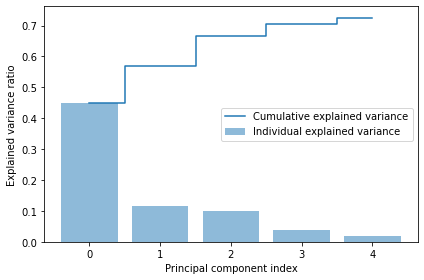

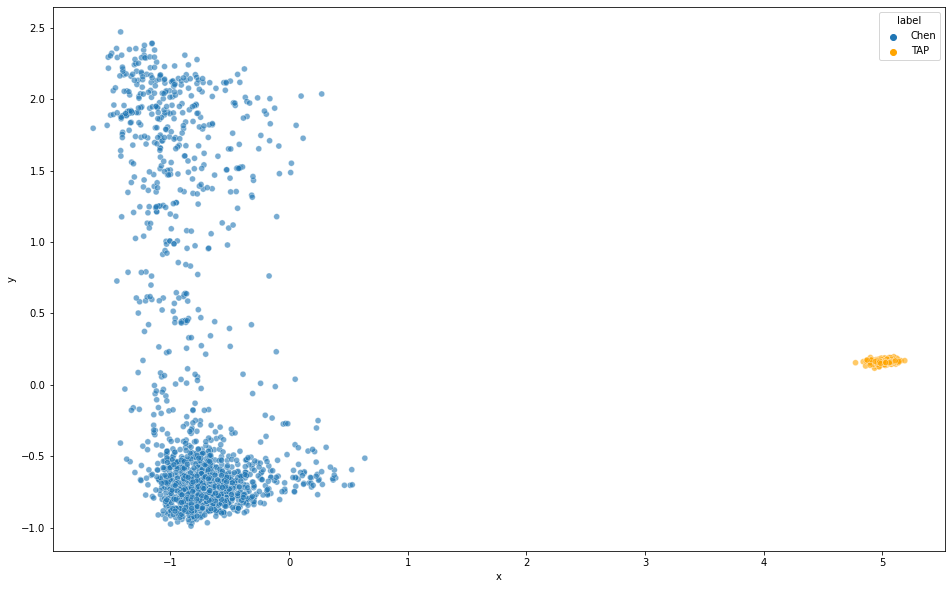

In [68]:
pca_transformed = plot_pca(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=5, comp_to_plot=[0,1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1818 samples in 0.002s...
[t-SNE] Computed neighbors for 1818 samples in 0.645s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1818
[t-SNE] Computed conditional probabilities for sample 1818 / 1818
[t-SNE] Mean sigma: 0.602951
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.765114
[t-SNE] KL divergence after 300 iterations: 1.117934


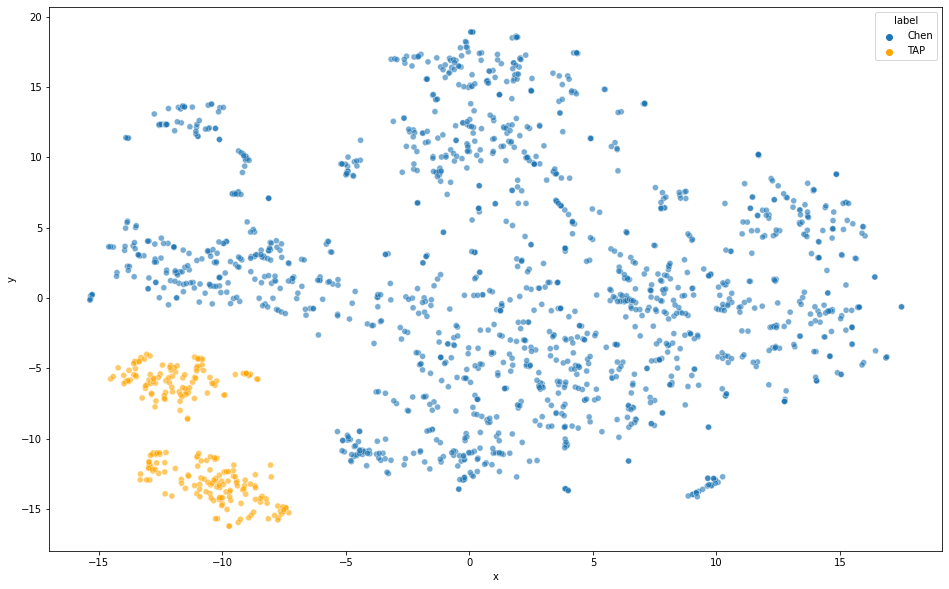

In [69]:
plot_tsne(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=2, perplexity=40, n_iter=300, metric="euclidean")

# One-hot encoding

In [19]:
x_chen = pd.read_feather(path.join(DATA_DIR, "chen/onehot/chen_onehot.ftr"))
x_chen = x_chen.merge(chen_data[["Antibody_ID"]], left_on="Ab_ID", right_on="Antibody_ID").drop("Antibody_ID", axis=1)
#x_chen = x_chen.loc[chen_data.index]
x_chen.head()

,Ab_ID,1_-_x,1_A_x,1_C_x,1_D_x,1_E_x,1_F_x,1_G_x,1_H_x,1_I_x,...,127_M_y,127_N_y,127_P_y,127_Q_y,127_R_y,127_S_y,127_T_y,127_V_y,127_W_y,127_Y_y
0,12e8,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15c8,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1a0q,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1a14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1a2y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x_tap = pd.read_feather(path.join(DATA_DIR, "tap/onehot/tap_onehot.ftr"))
x_tap.head()

,Ab_ID,1_-_x,1_A_x,1_C_x,1_D_x,1_E_x,1_F_x,1_G_x,1_H_x,1_I_x,...,127_M_y,127_N_y,127_P_y,127_Q_y,127_R_y,127_S_y,127_T_y,127_V_y,127_W_y,127_Y_y
0,Abagovomab,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abituzumab,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abrilumab,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Actoxumab,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adalimumab,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x_chen["label"] = "SAbDab"
x_tap["label"] = "TAP"
x_data = pd.concat([x_chen, x_tap])

,Ab_ID,1_-_x,1_A_x,1_C_x,1_D_x,1_E_x,1_F_x,1_G_x,1_H_x,1_I_x,...,127_N_y,127_P_y,127_Q_y,127_R_y,127_S_y,127_T_y,127_V_y,127_W_y,127_Y_y,label
0,12e8,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SAbDab
1,15c8,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SAbDab
2,1a0q,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SAbDab
3,1a14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SAbDab
4,1a2y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SAbDab


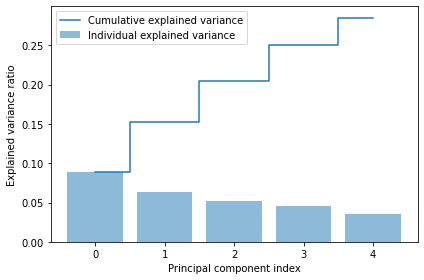

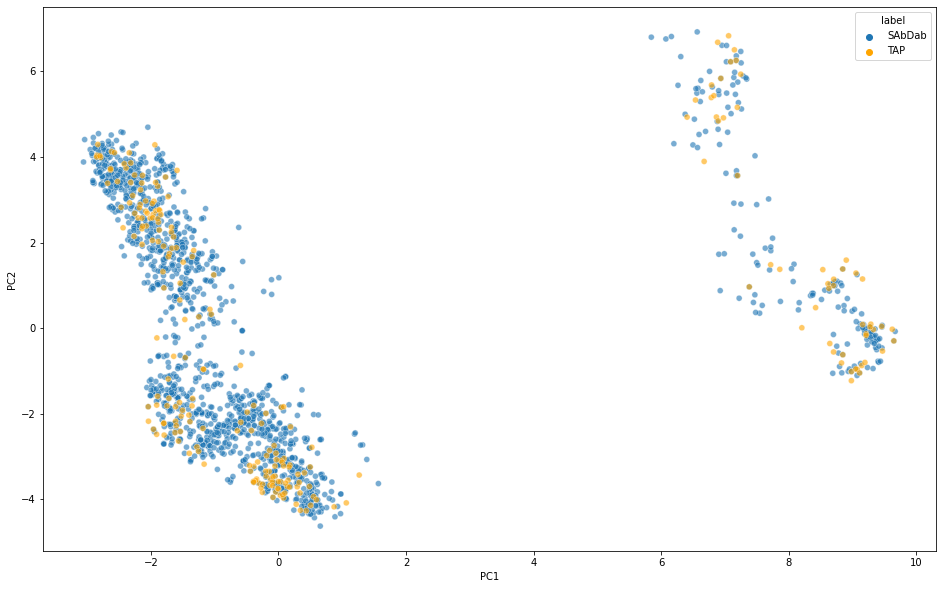

In [23]:
pca_transformed = plot_pca(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=5, comp_to_plot=[0,1])